### https://huggingface.co/amused/amused-512
### !pip install transformers accelerate diffusers

In [1]:
import torch
from diffusers import AmusedImg2ImgPipeline
from diffusers import AmusedPipeline
from diffusers.utils import load_image

/opt/conda/envs/torch_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
pipe_img_2_img = AmusedImg2ImgPipeline.from_pretrained(
    "amused/amused-512", variant="fp16", torch_dtype=torch.float16
)
pipe_img_2_img = pipe_img_2_img.to("cuda")


pipe_txt_2_img = AmusedPipeline.from_pretrained(
    "amused/amused-512", variant="fp16", torch_dtype=torch.float16
)
pipe_txt_2_img = pipe_txt_2_img.to("cuda")

Loading pipeline components...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 13.37it/s]


In [19]:
prompt = "A high resolution photo of a boy running.The background is a desert and a night blue sky with a bright star"
# input_image = (
#     load_image(
#         "https://raw.githubusercontent.com/huggingface/amused/main/assets/image2image_512_orig.png"
#     )
#     .resize((512, 512))
#     .convert("RGB")
# )

input_image = (
    load_image(
        "MnJ.png"
    )
    .resize((512, 512))
    .convert("RGB")
)

# img to img
# image = pipe_img_2_img(prompt, input_image, generator=torch.Generator('cuda').manual_seed(20), strength=1).images[0]

# txt to img
image = pipe_txt_2_img(prompt, generator=torch.Generator('cuda').manual_seed(20)).images[0]
image.save('image2image_512.png')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 21.70it/s]


In [5]:
from PIL import Image
from IPython.display import display

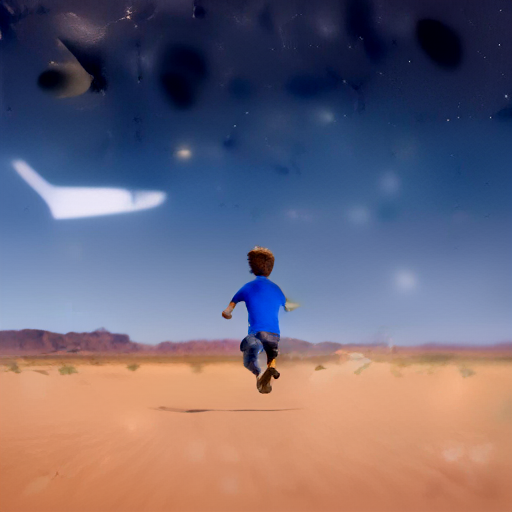

In [20]:
img = Image.open('image2image_512.png')
display(img)